In [ ]:
import torch
import json
import numpy as np
from functools import reduce
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_irrelevant_neurons(
    n_layers,
    n_neurons_per_layer,
    predicted_ids_list_path,
    model_path,
    attributions_path
):
    n_irrelevant_neurons_list=[]
    with open(f"{model_path}/vocab.json") as json_file:
        char_id_to_char_dict = {y: x for x, y in json.load(json_file).items()}
    for layer_num in range(1,n_layers):
        attributions = torch.load(
            f"{attributions_path}/attr_fleurs_L{layer_num}.pt",
            map_location=torch.device('cpu')
        )
        relevant_neurons_list = []
        std_list = []
        for char_id in predicted_ids_list.unique():
            mean_attribution = torch.mean(torch.index_select(attributions, 0, torch.where(predicted_ids_list==char_id.item())[0]), dim=0)
            std = torch.std(mean_attribution).item()
            relevant_neurons_list += torch.where(mean_attribution>std)
            relevant_neurons_list += torch.where(mean_attribution<-std)
        n_irrelevant_neurons_list += [n_neurons_per_layer-torch.cat(relevant_neurons_list).unique().shape[0]]
    return n_irrelevant_neurons_list

In [ ]:
n_irrelevant_neurons_list_base = get_irrelevant_neurons(12,768,predicted_ids_list_path_base,model_path_base,attributions_path_base)
n_irrelevant_neurons_list_base_vp = get_irrelevant_neurons(12,768,predicted_ids_list_path_base_vp,model_path_base_vp,attributions_path_base_vp)
n_irrelevant_neurons_list_base_lp = get_irrelevant_neurons(12,768,predicted_ids_list_path_base_lp,model_path_base_lp,attributions_path_base_lp)
n_irrelevant_neurons_list_large = get_irrelevant_neurons(24,1024,predicted_ids_list_path_large,model_path_large,attributions_path_large)
n_irrelevant_neurons_list_large_vp = get_irrelevant_neurons(24,1024,predicted_ids_list_path_large_vp,model_path_large_vp,attributions_path_large_vp)
n_irrelevant_neurons_list_large_xlsr = get_irrelevant_neurons(24,1024,predicted_ids_list_path_large_xlsr,model_path_large_xlsr,attributions_path_large_xlsr)
n_irrelevant_neurons_list_large_lp = get_irrelevant_neurons(24,1024,predicted_ids_list_path_large_lp,model_path_large_lp,attributions_path_large_lp)
n_irrelevant_neurons_list_xlarge = get_irrelevant_neurons(48,1280,predicted_ids_list_path_xlarge,model_path_xlarge,attributions_path_xlarge)
n_irrelevant_neurons_list_xlarge_xlsr = get_irrelevant_neurons(48,1280,predicted_ids_list_path_xlarge_xlsr,model_path_xlarge_xlsr,attributions_path_xlarge_xlsr)

In [ ]:
n_irrelevant_neurons_list_base_np = np.array(n_irrelevant_neurons_list_base)/768*100
n_irrelevant_neurons_list_base_vp_np = np.array(n_irrelevant_neurons_list_base_vp)/768*100
n_irrelevant_neurons_list_base_lp_np = np.array(n_irrelevant_neurons_list_base_lp)/768*100
n_irrelevant_neurons_list_large_np = np.array(n_irrelevant_neurons_list_large)/1024*100
n_irrelevant_neurons_list_large_vp_np = np.array(n_irrelevant_neurons_list_large_vp)/1024*100
n_irrelevant_neurons_list_large_xlsr_np = np.array(n_irrelevant_neurons_list_large_xlsr)/1024*100
n_irrelevant_neurons_list_large_lp_np = np.array(n_irrelevant_neurons_list_large_lp)/1024*100
n_irrelevant_neurons_list_xlarge_np = np.array(n_irrelevant_neurons_list_xlarge)/1280*100
n_irrelevant_neurons_list_xlarge_np = np.array(n_irrelevant_neurons_list_xlarge)/1280*100
n_irrelevant_neurons_list_xlarge_xlsr_np = np.array(n_irrelevant_neurons_list_xlarge_xlsr)/1280*100

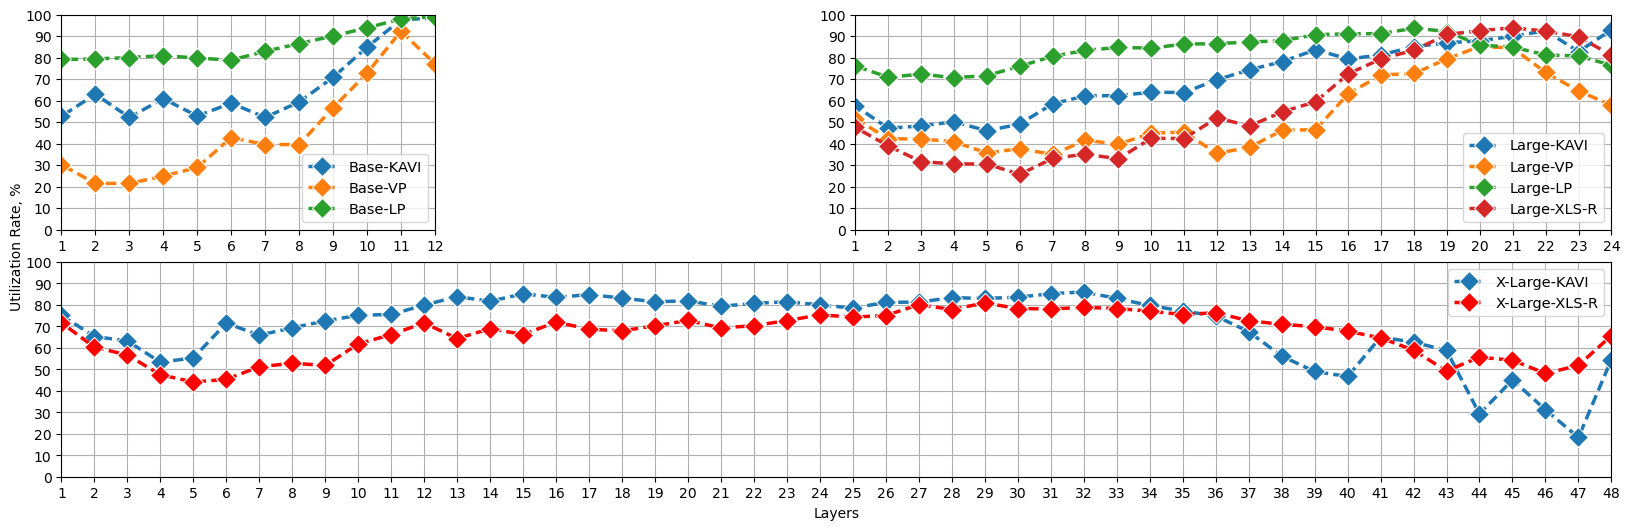

In [7]:
plt.figure(figsize=(20, 6))

ax8 = plt.subplot(1,1,1)
ax8.spines['top'].set_color('none')
ax8.spines['bottom'].set_color('none')
ax8.spines['left'].set_color('none')
ax8.spines['right'].set_color('none')
ax8.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = plt.subplot(2,4,1)
ax5 = plt.subplot(2,2,2)
ax7 = plt.subplot(2,1,2)
ax = [ax1, ax5, ax7]

labels = ["Base-KAVI","Base-VP","Base-LP","Large-KAVI","Large-VP","Large-LP", "Large-XLS-R","X-Large-KAVI","X-Large-XLS-R"]
for idx,model_data in enumerate([100-np.append(0,n_irrelevant_neurons_list_base_np),
                               100-np.append(0,n_irrelevant_neurons_list_base_vp_np),
                               100-np.append(0,n_irrelevant_neurons_list_base_lp_np),
                               100-np.append(0,n_irrelevant_neurons_list_large_np),
                               100-np.append(0,n_irrelevant_neurons_list_large_vp_np),
                               100-np.append(0,n_irrelevant_neurons_list_large_lp_np),
                               100-np.append(0,n_irrelevant_neurons_list_large_xlsr_np),
                               100-np.append(0,n_irrelevant_neurons_list_xlarge_np),
                               100-np.append(0,n_irrelevant_neurons_list_xlarge_xlsr_np),
                              ]):

    if idx<=2:
        i=0
        n_layers=12
    elif 3<=idx<=6:
        i=1
        n_layers=24
    else:
        i=2
        n_layers=48

    if idx==8:
        g = sns.lineplot(ax=ax[i], data=model_data, label=labels[idx], markers=True, dashes=(3, 1.5), marker='D', color='r', markersize=10, linewidth=2.5)
    else:
        g = sns.lineplot(ax=ax[i], data=model_data, label=labels[idx], markers=True, dashes=(3, 1.5), marker='D', markersize=10, linewidth=2.5)

    ax[i].set_ylim([0, 100])
    ax[i].set_xlim([1, n_layers])
    ax[i].set_xticks(np.arange(1,n_layers+1))
    ax[i].set_yticks(np.arange(0,110,10))
for item in ax:
    item.grid()
    item.legend(fontsize="10.5")

ax[2].set_xlabel('Layers')
ax8.set_ylabel('Utilization Rate, %')

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.show()
# plt.savefig('ig_analysis.svg')